In [117]:
import pandas as pd
import numpy as np
import sklearn 
print( 'The scikit learn version is {}.'.format(sklearn.__version__))


The scikit learn version is 1.0.2.


In [118]:
from sklearn import datasets

In [119]:
iris = datasets.load_iris()

In [120]:
X_iris,y_iris = iris.data,iris.target
print(X_iris.shape,y_iris.shape)

(150, 4) (150,)


In [121]:
print( X_iris[0], y_iris[0])


[5.1 3.5 1.4 0.2] 0


In [122]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X,y = X_iris[:,:2],y_iris
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(112, 2) (112,)


In [123]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

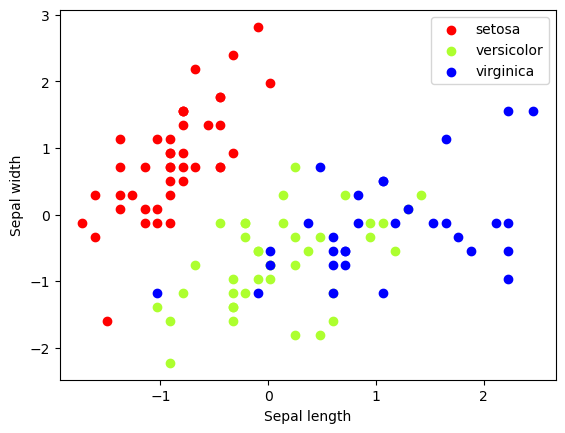

In [124]:
import matplotlib.pyplot as plt
colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [125]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

print( clf.coef_)

[[-33.30887615  20.19180986]
 [ -6.88559092  -7.10771742]
 [  6.61372382   1.67511739]]


In [126]:
print( clf.intercept_)

[-19.38796972  -0.87479259  -2.03901742]


In [130]:
print(y_train)

[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


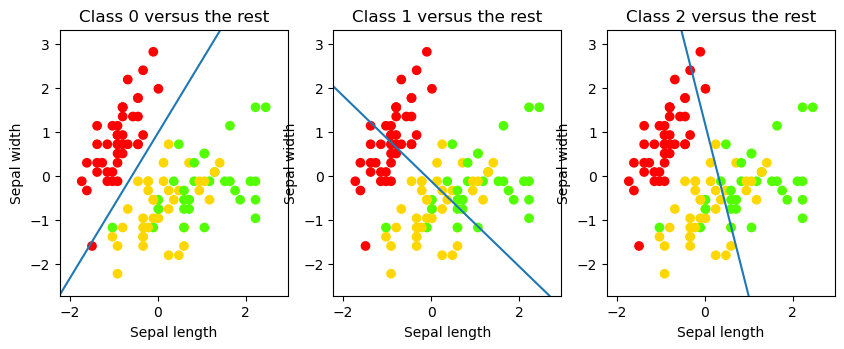

In [136]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)

for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [137]:
print( clf.predict(scaler.transform([[4.7, 3.1]])) )

print( clf.decision_function(scaler.transform([[4.7, 3.1]])) )

[0]
[[ 24.2705653    7.1971055  -10.22748564]]


In [138]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.8571428571428571


In [139]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.6842105263157895


In [140]:
print( metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.44      0.36      0.40        11
   virginica       0.67      0.74      0.70        19

    accuracy                           0.68        38
   macro avg       0.70      0.70      0.70        38
weighted avg       0.67      0.68      0.68        38



In [141]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[ 8  0  0]
 [ 0  4  7]
 [ 0  5 14]]


In [142]:
print("My name is Eunbi Han")
print("My NetID is: eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")


My name is Eunbi Han
My NetID is: eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


# Treasury Squeeze Raw Score Data Implementation

In [174]:
import csv 

In [175]:
df = pd.read_csv('/Users/han-eunbi/Desktop/UIUC/23Spring/IE517/Treasury Squeeze raw score data.csv',header=None)

In [176]:
df=df.drop([0,1],axis=1)
df.head()

,2,3,4,5,6,7,8,9,10,11
0,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
1,0.157659255,0.900783269,0.016052581,1,1,0.902810662,1,0.010742826,0.099312908,TRUE
2,0.018587922,1,1,0.084723532,0.778847085,1,0.136068955,0.154116204,1,FALSE
3,0.035755198,0.045987096,0.673542818,1,0.027688954,0.067889485,0.007696184,0.034742591,0.17167602,FALSE
4,0.663832349,1,0.063056817,0.188899323,0.064453868,0.005741804,0.166102377,0.956667793,1,TRUE


In [177]:
df.rename(columns=df.iloc[0],inplace=True)
df=df.drop([0],axis=0)


In [178]:
df.columns

Index(['price_crossing', 'price_distortion', 'roll_start', 'roll_heart',
       'near_minus_next', 'ctd_last_first', 'ctd1_percent', 'delivery_cost',
       'delivery_ratio', 'squeeze'],
      dtype='object')

In [179]:
X_t, y_t = df.loc[:,['price_crossing', 'price_distortion', 'roll_start', 'roll_heart',
       'near_minus_next', 'ctd_last_first', 'ctd1_percent', 'delivery_cost',
       'delivery_ratio']],df.loc[:,['squeeze']] 

In [180]:
print(X_t.shape,y_t.shape)

(900, 9) (900, 1)


In [181]:
X_t = np.array(X_t)
y_t = np.array(y_t['squeeze'])

## get dataset to plot

In [151]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#get dataset with only the first two attributes
X,y = X_t[:,:2],y_t


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(675, 2) (675,)


In [153]:
#standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'ys')

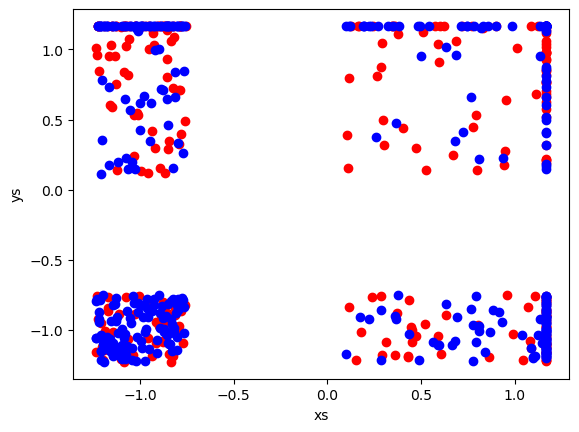

In [154]:
import matplotlib.pyplot as plt
colors = ['red',  'blue']
count = 0
for i in (['TRUE','FALSE']):

    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[count])
    count+=1

plt.xlabel('xs')
plt.ylabel('ys')

## Get data again to train model

In [ ]:
X,y = X_t[:,:],y_t

In [163]:
#split dataset into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=33)
print( X_train.shape, y_train.shape)

(675, 9) (675,)


In [164]:
#standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [166]:
print( clf.coef_)
print( clf.intercept_)

[[ 0.15903956  0.49320566  0.82792196 -1.14716694 -0.19854718  1.24162279
   0.1908701  -0.24879855  0.89389527]]
[-0.50802356]


In [168]:
# suppose we have a new instance with 9 new features 
print( clf.predict(scaler.transform([[1,1,1,1,1,1,1,1,1]])) )

['TRUE']


In [169]:
print( clf.decision_function(scaler.transform([[1,1,1,1,1,1,1,1,1]])) )

[2.28804349]


In [170]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.5925925925925926


In [171]:
y_pred = clf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.5822222222222222


In [172]:
print( metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

       FALSE       0.68      0.58      0.63       136
        TRUE       0.48      0.58      0.53        89

    accuracy                           0.58       225
   macro avg       0.58      0.58      0.58       225
weighted avg       0.60      0.58      0.59       225



In [173]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[79 57]
 [37 52]]


In [182]:
print("My name is Eunbi Han")
print("My NetID is: eunbih2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")


My name is Eunbi Han
My NetID is: eunbih2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
